In [1]:
# Project 3 
# model comparison section on R learn thing help for knn train and test

In [1]:
library("tidyverse")
library("DT")
library("ggplot2")
library("dplyr")
library(cluster)
library(pheatmap)
library(tigris)
library(sf)
library(geojsonio)
library(corrplot)
library("ggrepel")
library("ggcorrplot")
library(factoextra )
library(dplyr)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: ‘geojsonio’


The following object is masked from ‘package:base’:

    pretty


corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [29]:
snapshot_urlfile = "https://raw.githubusercontent.com/ncliu95/smu_dm_project_2/main/texas_snapshot_with_census_pol.csv"

In [30]:
snapshot_cases <- read_csv(url(snapshot_urlfile))
snapshot_cases <- snapshot_cases %>% mutate_if(is.character, factor)

Rows: 254 Columns: 270
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (9): county_name.x, state.x, state.y, state_po, county_name.y, office...
dbl  (250): county_fips_code, state_fips_code, confirmed_cases, deaths, geo_...
lgl   (10): pop_5_years_over, speak_only_english_at_home, speak_spanish_at_h...
date   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Data Preprocessing 
NA removal, normalization, & selection of proper features

In [31]:
# Calculate rates (per 1000 people) and select important variables
# And normalize by population
snapshot_cases <- snapshot_cases %>% mutate(
  cases_per_1000 = confirmed_cases/total_pop*1000, 
  deaths_per_1000 = deaths/total_pop*1000, 
  death_per_case = deaths/confirmed_cases,
    hispanic_ratio = hispanic_pop/total_pop,
    percent_male_pop = male_pop/total_pop,
    percent_female_pop = female_pop/total_pop,
    white_ratio = white_pop/total_pop,
    black_ratio = black_pop/total_pop,
    asian_ratio = asian_pop/total_pop,
    amerindian_ratio = amerindian_pop/total_pop,
    other_race_ratio = other_race_pop/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_employed_agriculture_forestry_fishing_hunting_mining = employed_agriculture_forestry_fishing_hunting_mining/total_pop,
    percent_employed_arts_entertainment_recreation_accommodation_food = employed_arts_entertainment_recreation_accommodation_food/total_pop,
    percent_employed_construction = employed_construction/total_pop,
    percent_employed_education_health_social = employed_education_health_social/total_pop,
    percent_employed_finance_insurance_real_estate = employed_finance_insurance_real_estate/total_pop,
    percent_employed_information = employed_information/total_pop,
    percent_employed_manufacturing = employed_manufacturing/total_pop,
    percent_employed_other_services_not_public_admin = employed_other_services_not_public_admin/total_pop,
    percent_employed_public_administration = employed_public_administration/total_pop,
    percent_employed_retail_trade = employed_retail_trade/total_pop,
    percent_employed_science_management_admin_waste = employed_science_management_admin_waste/total_pop,
    percent_employed_transportation_warehousing_utilities = employed_transportation_warehousing_utilities/total_pop,
    percent_employed_wholesale_trade = employed_wholesale_trade/total_pop,
    percent_unemployed = unemployed_pop/total_pop,
    percent_children = children/total_pop,
    percent_commute_by_bus = commuters_by_bus/employed_pop,
    percent_commute_by_car_truck_van = commuters_by_car_truck_van/employed_pop,
    percent_commute_by_carpool = commuters_by_carpool/employed_pop,
    percent_commute_by_subway = commuters_by_subway_or_elevated/employed_pop,
    percent_commute_by_driving_alone = commuters_drove_alone/employed_pop,
    percent_wfh = worked_at_home/employed_pop
)


In [32]:
# Download county data for Texas
tx_counties <- counties(state = "TX")
tx_counties$GEOID <- as.numeric(tx_counties$GEOID)
snapshot_cases <- left_join(snapshot_cases, tx_counties[, c("GEOID", "ALAND")], by = c("county_fips_code" = "GEOID"))
snapshot_cases <- snapshot_cases %>% mutate(
  pop_density = total_pop/ALAND)

Retrieving data for the year 2021



In [33]:
data <- select(snapshot_cases, 
                  'county_name.x',
'median_income',
'cases_per_1000',
'deaths_per_1000',
'death_per_case',
'hispanic_ratio',
'pop_density',
'party',
'median_age',
'poverty',
'bachelors_degree',   
'commuters_by_public_transportation',
'percent_male_pop',
'percent_female_pop',
'median_age',
'median_rent',
'white_ratio',
'black_ratio',
'asian_ratio',
'amerindian_ratio',
'other_race_ratio',
'percent_employed_agriculture_forestry_fishing_hunting_mining',
'percent_employed_arts_entertainment_recreation_accommodation_food', 
'percent_employed_construction' ,
'percent_employed_education_health_social',
'percent_employed_finance_insurance_real_estate',
'percent_employed_information', 
'percent_employed_manufacturing', 
'percent_employed_other_services_not_public_admin',
'percent_employed_public_administration',
'percent_employed_retail_trade',
'percent_employed_science_management_admin_waste',
'percent_employed_transportation_warehousing_utilities',
'percent_employed_wholesale_trade',
'percent_unemployed',
'percent_children',
 'percent_commute_by_bus',
'percent_commute_by_car_truck_van',
'percent_commute_by_carpool',
'percent_commute_by_subway',
'percent_commute_by_driving_alone',
'percent_wfh'             )

In [34]:
data <- data %>% mutate(party = ifelse(party == "REPUBLICAN", 0, 1))

In [35]:
# Check for missing values and if return true then nothing missing

table(complete.cases(data))


TRUE 
 254 

In [36]:
# Check that class variable is a factor! 
str(data)

tibble [254 × 41] (S3: tbl_df/tbl/data.frame)
 $ county_name.x                                                    : Factor w/ 254 levels "Anderson County",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ median_income                                                    : num [1:254] 42313 70753 46472 44601 63192 ...
 $ cases_per_1000                                                   : num [1:254] 96.5 91.4 77.1 36 78.9 ...
 $ deaths_per_1000                                                  : num [1:254] 1.3 2.11 2.2 1.05 1.14 ...
 $ death_per_case                                                   : num [1:254] 0.0135 0.023 0.0285 0.0291 0.0144 ...
 $ hispanic_ratio                                                   : num [1:254] 0.1728 0.554 0.2152 0.2704 0.0831 ...
 $ pop_density                                                      : num [1:254] 2.10e-05 4.52e-06 4.24e-05 3.80e-05 3.76e-06 ...
 $ party                                                            : num [1:254] 0 0 0 0 0 0 0 0 0 0 ...
 $ me

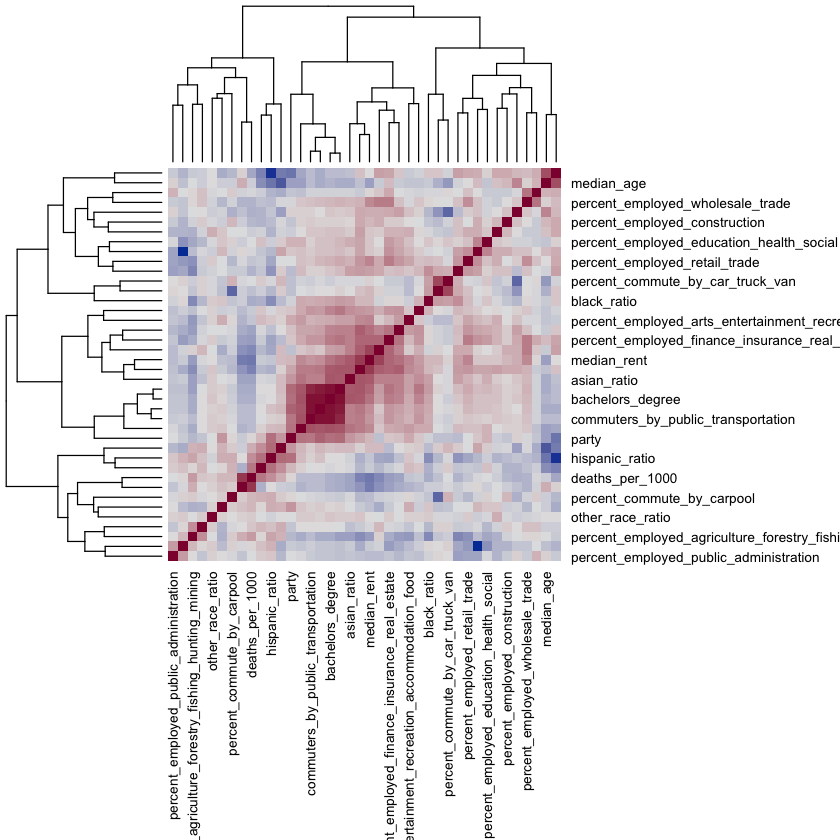

In [37]:
# Check correlation for numeric variables 

library('seriation')
cm <- cor(data %>% select_if(is.numeric) %>% na.omit)
hmap(cm, margins = c(14,14))

# Creating a Class Variable
bad means high death per case value 

In [38]:
# Create class variable 
# Bad is the considered a high fatality rate, 0.024 is taken from project 2 average deaths per case value
data <- data %>% mutate(bad = as.factor(death_per_case >= 0.024))

In [39]:
data %>% pull(bad) %>% table()

.
FALSE  TRUE 
  142   112 

In [40]:
# This helps us to label which counties in Texas are considered bad which therefore tells us who needs the most help
data %>% group_by(county_name.x) %>% 
    summarize(bad_pct = sum(bad == TRUE)/n()) %>%
    arrange(desc(bad_pct))

county_name.x,bad_pct
<fct>,<dbl>
Angelina County,1
Aransas County,1
Armstrong County,1
Bandera County,1
Baylor County,1
Blanco County,1
Bowie County,1
Briscoe County,1
Brooks County,1


# Splitting into Training and Test Data

In [41]:
# Split into training data
set.seed(12345)
split_length <- length(data) / 2
cases_train <- sample_n(data,split_length)
cases_train %>% pull(bad) %>% table()

.
FALSE  TRUE 
   13     8 

In [42]:
# Split into the test data
cases_test <- data %>% filter(!(county_name.x %in% cases_train))
cases_test %>% pull(bad) %>% table() 

.
FALSE  TRUE 
  142   112 

# Selecting Features 

In [43]:
# selecting features 
counties <- as_tibble(map_data("county"))
counties <- counties %>% dplyr::filter(region == "texas") %>% rename(c(county = subregion)) 

print(head(counties))

# add variables to map data
counties_all <- counties %>% left_join(cases_train %>% 
    mutate(county = county_name.x %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

# A tibble: 6 × 6
   long   lat group order region county  
  <dbl> <dbl> <dbl> <int> <chr>  <chr>   
1 -95.8  31.5  2492 74520 texas  anderson
2 -95.8  31.6  2492 74521 texas  anderson
3 -95.8  31.6  2492 74522 texas  anderson
4 -95.7  31.6  2492 74523 texas  anderson
5 -95.7  31.6  2492 74524 texas  anderson
6 -95.7  31.6  2492 74525 texas  anderson


Joining with `by = join_by(county)`


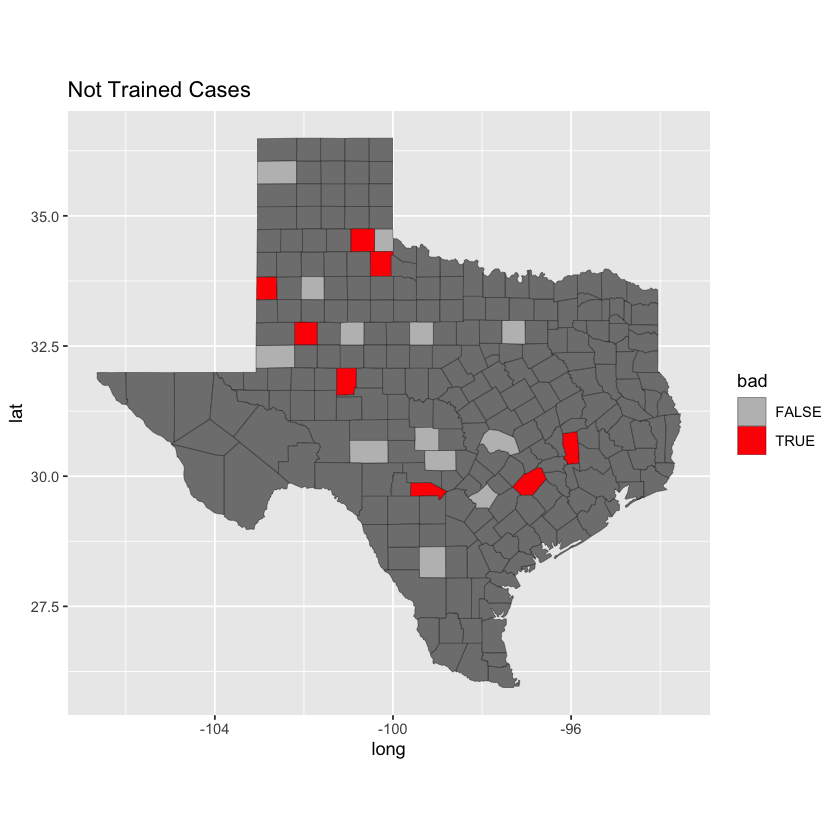

In [44]:
ggplot(counties_all, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
    coord_quickmap() + scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("Not Trained Cases")

# Check for Variable Importance

In [45]:
install.packages("FSelector")
library(FSelector)


The downloaded binary packages are in
	/var/folders/h8/8xfdp2m50bl044fcgls98dtw0000gn/T//Rtmpk2Ujrk/downloaded_packages


ERROR: Error: package or namespace load failed for ‘FSelector’:
 .onLoad failed in loadNamespace() for 'rJava', details:
  call: dyn.load(jli, FALSE)
  error: unable to load shared object '/Library/Java/JavaVirtualMachines/adoptopenjdk-11.jdk/Contents/Home/lib/jli/libjli.dylib':
  dlopen(/Library/Java/JavaVirtualMachines/adoptopenjdk-11.jdk/Contents/Home/lib/jli/libjli.dylib, 0x000A): tried: '/Library/Java/JavaVirtualMachines/adoptopenjdk-11.jdk/Contents/Home/lib/jli/libjli.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Library/Java/JavaVirtualMachines/adoptopenjdk-11.jdk/Contents/Home/lib/jli/libjli.dylib' (no such file), '/Library/Java/JavaVirtualMachines/adoptopenjdk-11.jdk/Contents/Home/lib/jli/libjli.dylib' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))


In [46]:
cases_train %>% chi.squared(bad ~., data = .) %>% arrange(desc(attr_importance)) %>% head()

ERROR: Error in chi.squared(bad ~ ., data = .): could not find function "chi.squared"


# Build a Model - Random Forest! 

In [47]:
#install.packages("caret")

library(caret)

In [48]:
# Fit the model (Random Forest)
# Don't use county name because they aren't useful and they make tree algorithms very slow 

fit <- cases_train %>% train(bad ~ . - county_name.x, data = . , method = "rf", trControl = trainControl(method = "cv", number = 10))
fit

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Random Forest 

21 samples
41 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19, 19, 18, 19, 19, 19, ... 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa
   2    0.8       0.50 
  21    0.9       0.75 
  40    0.9       0.75 

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 21.

In [49]:
install.packages("rpart.plot")
library(rpart.plot)

rpart.plot(fit$finalModel, extra = 2)


The downloaded binary packages are in
	/var/folders/h8/8xfdp2m50bl044fcgls98dtw0000gn/T//Rtmpk2Ujrk/downloaded_packages


Loading required package: rpart



ERROR: Error in rpart.plot(fit$finalModel, extra = 2): Not an rpart object


In [51]:
varImp(fit)

rf variable importance

  only 20 most important variables shown (out of 40)

                                                                   Overall
death_per_case                                                    100.0000
deaths_per_1000                                                    13.4825
median_rent                                                         7.2482
percent_commute_by_driving_alone                                    6.6536
percent_employed_science_management_admin_waste                     6.4999
median_age                                                          5.7212
percent_employed_public_administration                              4.8605
asian_ratio                                                         4.5091
bachelors_degree                                                    3.9650
percent_employed_information                                        3.9491
percent_employed_arts_entertainment_recreation_accommodation_food   3.8881
percent_employed_retai

# Test Data on the Model - Random Forest 

In [52]:
# Use the model from above to test the data 
# Important thing to note caret does not make prediction with missing data

cases_test <- cases_test %>% na.omit
cases_test$bad_predicted <- predict(fit, cases_test)

In [53]:
# Visualize the result

counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name.x %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining with `by = join_by(county)`


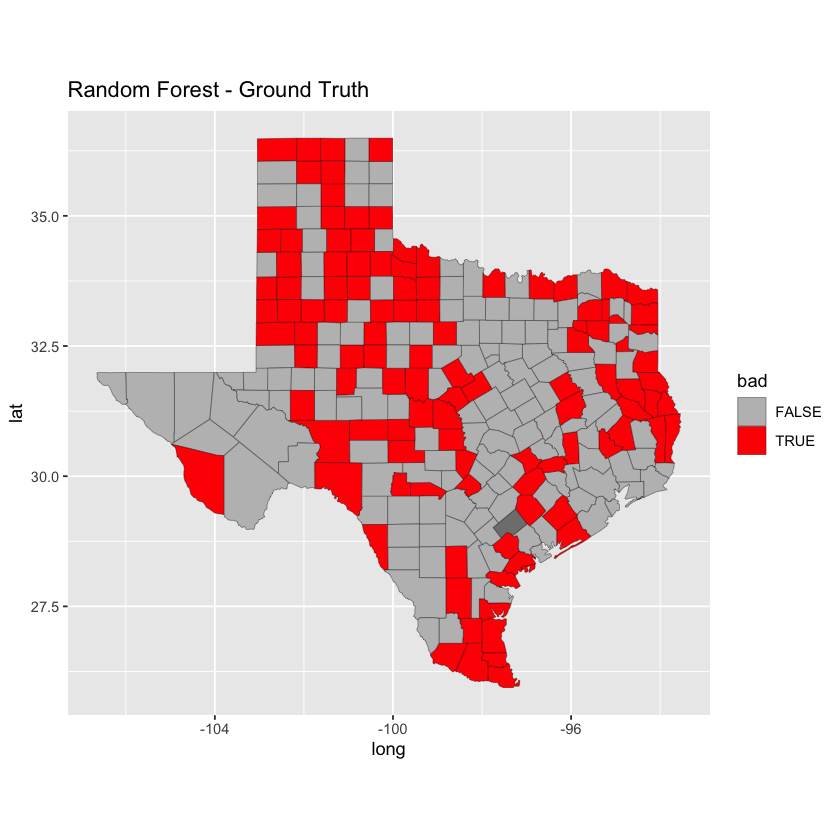

In [54]:
# Ground Truth 

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("Random Forest - Ground Truth")

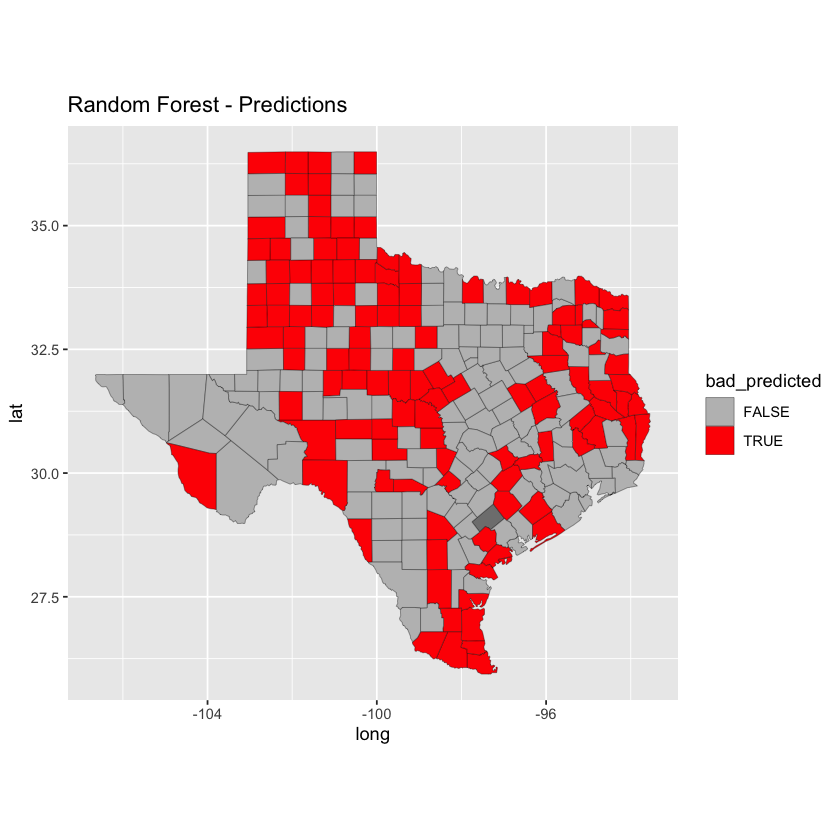

In [55]:
# Predictions

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("Random Forest - Predictions ")

In [56]:
# Confusion Matrix; 'Caret’s confusionMatrix() function calculates accuracy, 
# confidence intervals, kappa and many more evaluation metrics. '

confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   135    0
     TRUE      7  112
                                         
               Accuracy : 0.9724         
                 95% CI : (0.944, 0.9888)
    No Information Rate : 0.5591         
    P-Value [Acc > NIR] : < 2e-16        
                                         
                  Kappa : 0.9445         
                                         
 Mcnemar's Test P-Value : 0.02334        
                                         
            Sensitivity : 0.9507         
            Specificity : 1.0000         
         Pos Pred Value : 1.0000         
         Neg Pred Value : 0.9412         
             Prevalence : 0.5591         
         Detection Rate : 0.5315         
   Detection Prevalence : 0.5315         
      Balanced Accuracy : 0.9754         
                                         
       'Positive' Class : FALSE          
                                         

# Build a Model - K Nearest Neighbor 

In [73]:
# Fit the model (knn)
# Don't use county name because they aren't useful and they make tree algorithms very slow 

fit_knn <- cases_train %>%
  train(bad ~ . - county_name.x,
    data = . ,
    method = "knn",
    preProcess = "scale",
    trControl = trainControl(method = "cv", number = 10)
    )
fit_knn

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


k-Nearest Neighbors 

21 samples
41 predictors
 2 classes: 'FALSE', 'TRUE' 

Pre-processing: scaled (40) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19, 18, 20, 19, 19, 19, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa 
  5  0.7166667  0.2375
  7  0.8000000  0.4250
  9  0.7333333  0.2500

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

# Test Data on the Model - K Nearest Neighbors

In [59]:
# No missing data allowed when using caret 

cases_test <- cases_test %>% na.omit
cases_test$bad_predicted <- predict(fit_knn, cases_test)

In [60]:
# Visualize the result

counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name.x %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining with `by = join_by(county)`


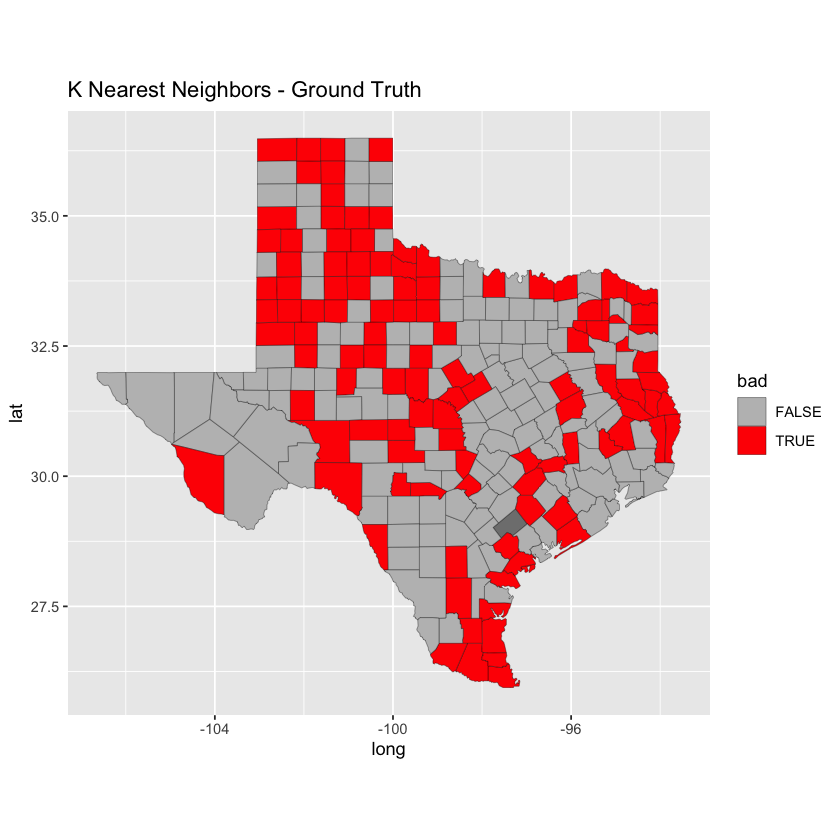

In [61]:
# K Nearest Neighbors - Ground Truth

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("K Nearest Neighbors - Ground Truth")

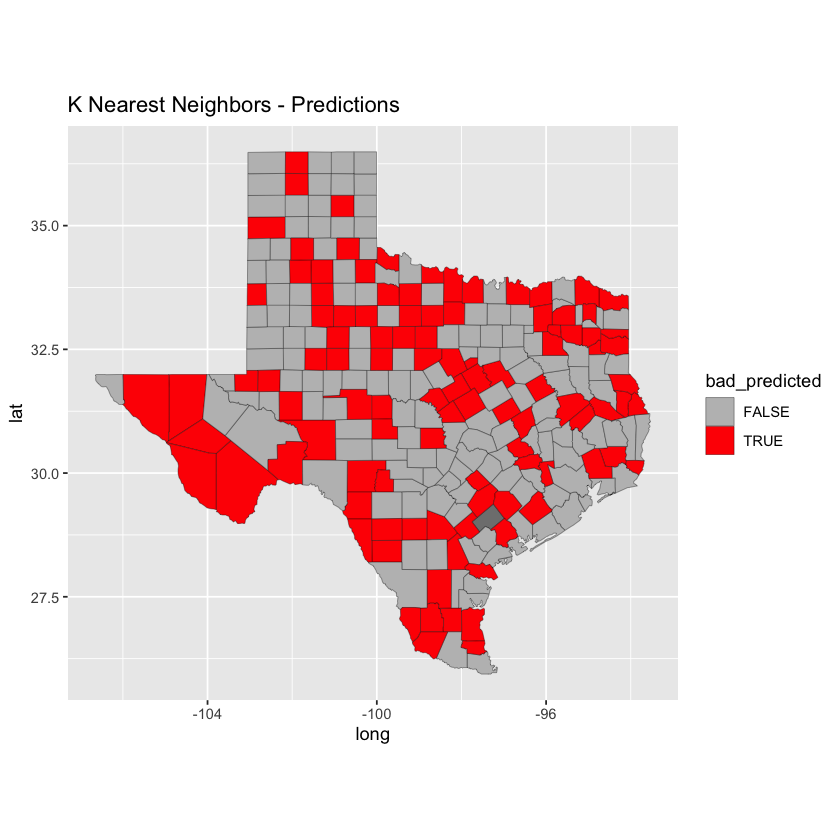

In [62]:
# K Nearest Neighbors - Predictions

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("K Nearest Neighbors - Predictions")

In [63]:
# Confusion Matrix; 'Caret’s confusionMatrix() function calculates accuracy, 
# confidence intervals, kappa and many more evaluation metrics. '

confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE    87   61
     TRUE     55   51
                                          
               Accuracy : 0.5433          
                 95% CI : (0.4799, 0.6057)
    No Information Rate : 0.5591          
    P-Value [Acc > NIR] : 0.7157          
                                          
                  Kappa : 0.0684          
                                          
 Mcnemar's Test P-Value : 0.6425          
                                          
            Sensitivity : 0.6127          
            Specificity : 0.4554          
         Pos Pred Value : 0.5878          
         Neg Pred Value : 0.4811          
             Prevalence : 0.5591          
         Detection Rate : 0.3425          
   Detection Prevalence : 0.5827          
      Balanced Accuracy : 0.5340          
                                          
       'Positive' Class : FALSE           
                     

# Build a Model - Naive Bayes!

In [64]:
# Fit the model (nb)
# Don't use county name because they aren't useful and they make tree algorithms very slow 

fit_nb <- cases_train %>%
  train(bad ~ . - county_name.x,
    data = . ,
    method = "nb",
    trControl = trainControl(method = "cv", number = 10)
    )
fit_nb

Warning message:
“model fit failed for Fold01: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: party, percent_commute_by_subway
”
Warning message:
“model fit failed for Fold02: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: party, percent_commute_by_subway
”
Warning message:
“model fit failed for Fold03: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: party, percent_commute_by_subway
”
Warning message:
“model fit failed for Fold04: usekernel=FALSE, fL=0, adjust=1 Error in NaiveBayes.default(x, y, usekernel = FALSE, fL = param$fL, ...) : 
  Zero variances for at least one class in variables: party, percent_commute_by_subway
”
Warning message:
“model 

Naive Bayes 

21 samples
41 predictors
 2 classes: 'FALSE', 'TRUE' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 19, 18, 19, 19, 18, 20, ... 
Resampling results across tuning parameters:

  usekernel  Accuracy  Kappa
  FALSE       NaN       NaN 
   TRUE      0.55      0.24 

Tuning parameter 'fL' was held constant at a value of 0
Tuning
 parameter 'adjust' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were fL = 0, usekernel = TRUE and adjust
 = 1.

# Test Data on the Model - Naive Bayes

In [67]:
# No missing data allowed when using caret 

cases_test <- cases_test %>% na.omit
cases_test$bad_predicted <- predict(fit_nb, cases_test)

Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 43”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 61”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 79”
Warning message in FUN(X[[i]], ...):
“Numerical 0 probability for all classes with observation 227”


In [68]:
# Visualize the result

counties_test <- counties %>% left_join(cases_test %>% 
    mutate(county = county_name.x %>% str_to_lower() %>% 
        str_replace('\\s+county\\s*$', '')))

Joining with `by = join_by(county)`


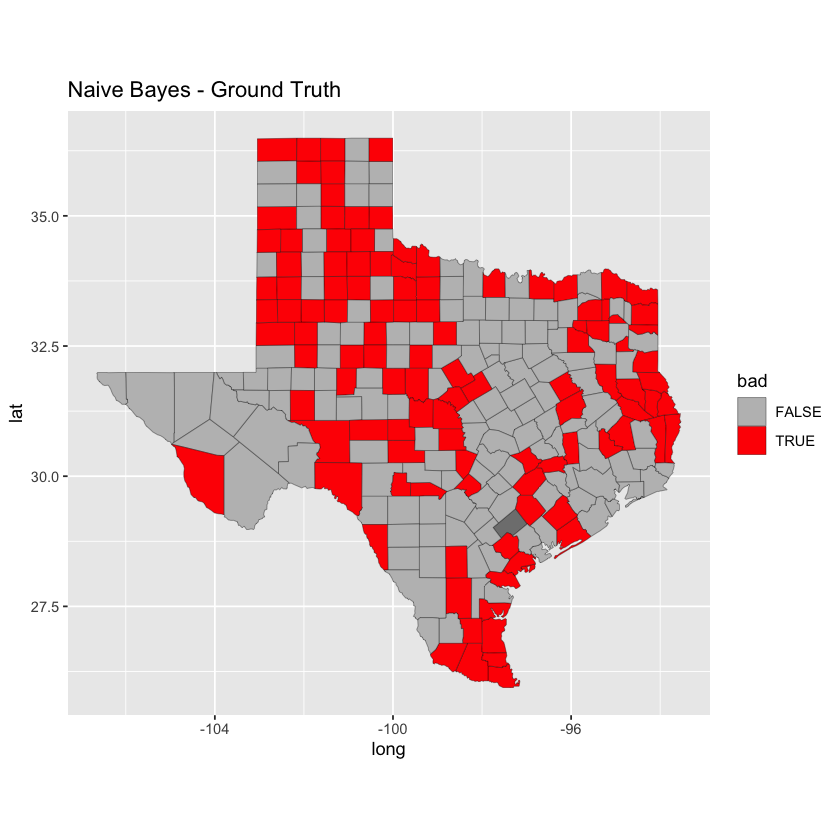

In [69]:
# Naive Bayes - Ground Truth

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad), color = "black", size = 0.1) + 
  coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("Naive Bayes - Ground Truth")

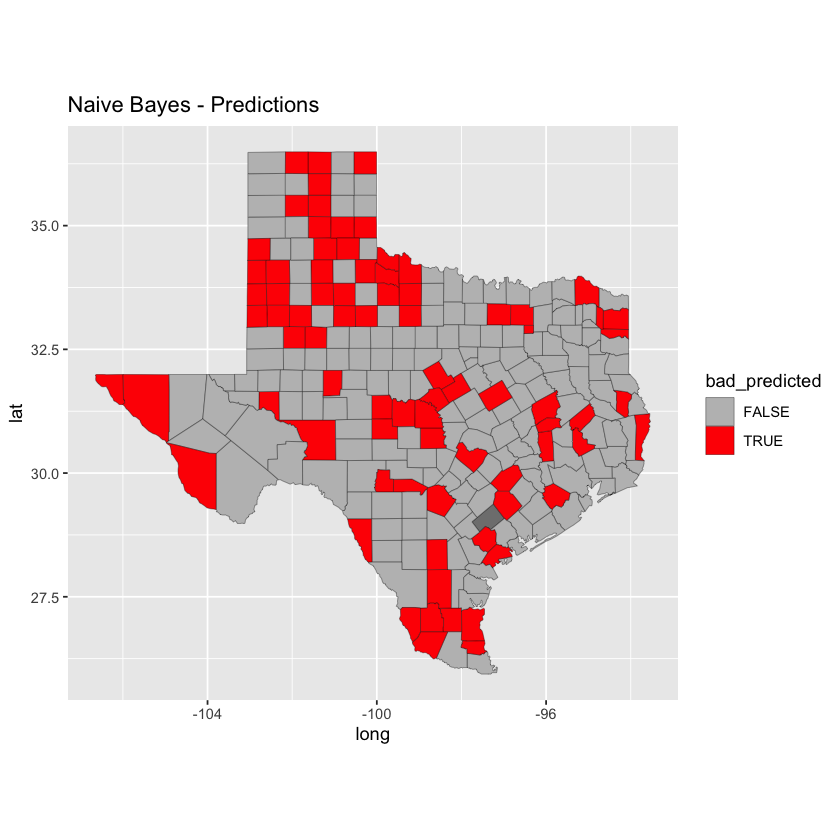

In [71]:
# Naive Bayes - Predictions

ggplot(counties_test, aes(long, lat)) + 
  geom_polygon(aes(group = group, fill = bad_predicted), color = "black", size = 0.1) + 
    coord_quickmap() + 
  scale_fill_manual(values = c('TRUE' = 'red', 'FALSE' = 'grey')) + ggtitle("Naive Bayes - Predictions")

In [72]:
# Confusion Matrix; 'Caret’s confusionMatrix() function calculates accuracy, 
# confidence intervals, kappa and many more evaluation metrics. '

confusionMatrix(data = cases_test$bad_predicted, ref = cases_test$bad)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   122   51
     TRUE     20   61
                                         
               Accuracy : 0.7205         
                 95% CI : (0.661, 0.7748)
    No Information Rate : 0.5591         
    P-Value [Acc > NIR] : 8.432e-08      
                                         
                  Kappa : 0.416          
                                         
 Mcnemar's Test P-Value : 0.0003704      
                                         
            Sensitivity : 0.8592         
            Specificity : 0.5446         
         Pos Pred Value : 0.7052         
         Neg Pred Value : 0.7531         
             Prevalence : 0.5591         
         Detection Rate : 0.4803         
   Detection Prevalence : 0.6811         
      Balanced Accuracy : 0.7019         
                                         
       'Positive' Class : FALSE          
                                         

In [30]:
library(ggpubr)
extra_work <- read_csv("DM_P3_EW.csv")
extra_work <- extra_work %>% mutate_if(is.character, factor)

New names:
• `` -> `...1`
Rows: 3 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (3): Accuracy, Sensitivity, Balenced Accuracy

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


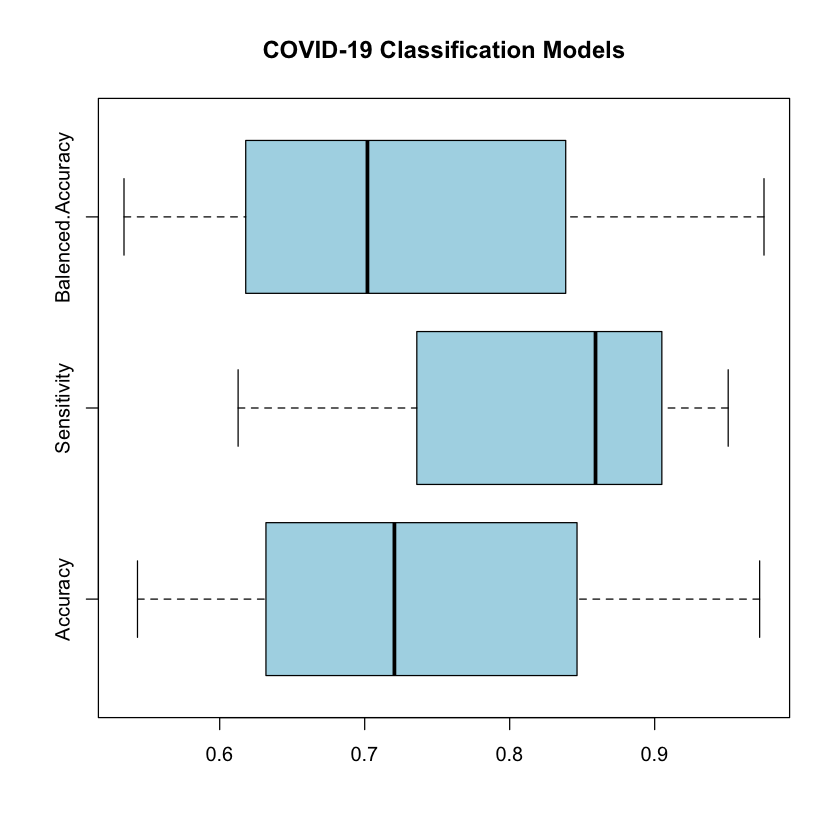

In [37]:
extra_work <- data.frame(extra_work)


boxplot(extra_work[,-1], horizontal=TRUE, main="COVID-19 Classification Models", col = "light blue")

